#Documenting your results
This Lab teaches you some of the basics of documenting machine learning projects.

Your task is to:

1. Download and describe the CIFAR10 image classification dataset.
2. Design and describe a small CNN that can solve the CIFAR10 problem.
3. Train your model and explain how you trained it.
4. Summarize your results using
 - Test set error (top-1 and top-5)
 - Test set accuracy
 - Confusion matrix
 - Precision/recall and Average Precision

We will be using Keras and [scikit-learn](https://scikit-learn.org/stable/index.html).

##Task 1: The dataset
Describing your dataset is important. Here is a list of aspects that could be of interest to the reader:

- What are you trying to predict?
- Where did the dataset come from? (Remember to cite if its a public dataset)
- How was it collected?
- Why was it collected?
- Why did you choose this dataset, and not that one over there?
- What is the output: categorial {0, 1, ..., K}, continuous scalar in [0, 1], arbitrary real no., etc.
- No. of classes, what are the classes?
- No. of observations, no. of observations per class if unbalanced.
- What is the size of the training set?
- Is there a test set? What is its size?
- Is there a baseline result that you can compare your results with?
- What is the state-of-the-art performance on this data set?

Finally, it might also be a good idea to show some actual observations/examples from the dataset.

###1.1 Download

In [1]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Uncomment below to convert class vectors to binary class matrices.
num_classes = 10 # Number of classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

###1.2 Questions
Try to answer as many of the above questions as possible (you don't need to write your answers down). You will be able to find many answers just by looking at the original source of the CIFAR 10 dataset:

https://www.cs.toronto.edu/~kriz/cifar.html


In [2]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


##Task 2: Network Architecture
So you are faced with a machine lerning problem. Which model should you use?

Well, that depends on the type of problem (classification, regression, clustering, etc.) and what the success criteria are (high accuracy, high speed, understanding structure in the data, etc).

###2.1 Design a CNN
Your task is design a CNN that solves the CIFAR10 problem. Motivate your choice of architecture and hyperparameters (number of layers, number of neurons/kernels in each layer, etc.) and regularization techniques.

I left a template below that you could use - you just need to fill in the gaps (marked with `???`). Feel free to design your own network or search the internet for alternative models.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import set_random_seed

set_random_seed(0) # make weight initialization deterministic

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256)) # W1*x + b
model.add(Activation('relu')) # ReLU(W1*x + b)
model.add(Dropout(0.5))
model.add(Dense(num_classes)) # W2*x + b
model.add(Activation('softmax'))  # softmax(W2*x + b)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**My model choice:** I chose a small capacity model over a large model, simply because its faster to train. You can add more capacity by adding more neurons in each layer and/or adding more layers. What is the risk of increasing your model's capacity (i.e., number of weights)?

Always remember to summarize your model in your report. This is easily done in Keras:

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,810 (682.85 KB)

 Trainable params: 174,810 (682.85 KB)

 Non-trainable params: 0 (0.00 B)

##Task 3: Model Training
Train your model and explain how you trained it. This includes:

- Data preprocessing
- [Data augmentation](https://medium.com/@saiwadotai/the-essential-guide-to-data-augmentation-in-deep-learning-f66e0907cdc8)?
- Train/validation split
- Choice of optimizer and its hyperparameters, including

 - learning rate
 - number of training epochs.
 - batch size

We have not covered all of the above in the lectures yet, but we will get there soon.

Here is a template that you can use (again, gaps are marked with ???).

**Note:** The template code assumes that you already have a validation set. We will just the test set provided with CIFAR10. Formally this is not the correct way to use a test set. Instead the validation set should be a random subset of training data, or possibly more subset if you use cross-validation. Then, ONLY after you are done training your model, you are allowed to evaluate it on your test set. If you wish to use a subset of the training data for validation, there is code for that in [Lab 2](https://github.com/klaverhenrik/Deep-Learning-for-Visual-Recognition-2024/blob/main/Lab2_FeatureExtractionAndTransferLearning.ipynb).

**Tip:** If training gets stuck at 10% validation accuracy, and it doesn't help to restart the training, try to reset the runtime environment in the Runtime menu, and then train again.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# initiate Adam optimizer
# (Note: this choice is somewhat arbitrary - see options here: https://keras.io/api/optimizers/)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
opt = Adam(learning_rate=lr_schedule)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Data preprocessing (normalization)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # 0 ... 1
x_test /= 255

data_augmentation = True
epochs = 10 # You should train for longer
batch_size = 64

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Using real-time data augmentation.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 61ms/step - accuracy: 0.1814 - loss: 2.1741 - val_accuracy: 0.3711 - val_loss: 1.7390
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 53ms/step - accuracy: 0.3534 - loss: 1.7604 - val_accuracy: 0.4304 - val_loss: 1.5802
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.3944 - loss: 1.6444 - val_accuracy: 0.4571 - val_loss: 1.4989
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4180 - loss: 1.5819 - val_accuracy: 0.4791 - val_loss: 1.4596
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4394 - loss: 1.5353 - val_accuracy: 0.4918 - val_loss: 1.4097
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4566 - loss: 1.4934 - val_accuracy: 0.5132 - val_loss: 1.3626
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.4718 - loss: 1.4576 - val_accuracy: 0.5038 - val_loss: 1.3861
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4875 - loss: 1.4279 - val_accurac

##Task 4: Summarizing your results
Summarize your results using
 - Test set error (top-1 and top-5)
 - Test set accuracy
 - Confusion matrix
 - Precision/recall curve
 - Average Precision

You might find the code below useful:

In [9]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
N = 32
print('\n# Generate predictions for N samples')
predictions = model.predict(x_test[:N],verbose=False)
print('predictions shape:', predictions.shape)


# Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5472 - loss: 1.2787
test loss, test acc: [1.2769505977630615, 0.5455999970436096]

# Generate predictions for N samples
predictions shape: (32, 10)


Run through all batches and store predictions:

In [11]:
import numpy as np
num_batches = int(np.floor(y_test.shape[0] / batch_size))
predictions = np.zeros((num_batches*batch_size,num_classes))
for i in range(num_batches):
  start = i*batch_size
  stop = (i+1)*batch_size
  predictions[start:stop,:] = model.predict(x_test[start:stop],verbose=False)

Note that variable `predictions` contains class probabilities (not class indices). Let's convert those to class indices using argmax:

In [12]:
predictions_class = np.argmax(predictions,axis=1)
print('predictions.shape:',predictions.shape)
print('predictions_class.shape:',predictions_class.shape)

predictions.shape: (9984, 10)
predictions_class.shape: (9984,)


Here is how do the same for the ground truth data:

In [13]:
y_test_class = np.argmax(y_test,axis=1) # Get class indices from one-hot encoding

Lets compare the first 20 predictions with the ground truth:

In [14]:
print('predictions_class[:20]',predictions_class[:20])
print('y_test_class[:20]     ',y_test_class[:20])

predictions_class[:20] [3 1 8 8 6 6 1 6 3 1 0 9 6 7 9 6 5 3 9 6]
y_test_class[:20]      [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


###4.1 Test set error
The **top-1 error** is simply the number of wrong predictions divided by the total numer of observations (in the test test set)

To calculate the **top-5 error** you must consider predicitons of all labels/classes and rank them. The easiest way to rank the predictions is to sort them by the predicted class probabilities. Once ranked, the top-5 error is calculated the same way as the top-1 error, except that a prediction is considered wrong only when the true label is not among the top-5 five predicions.

When sorting the predicted class probabilities, we are interested in the indices rather than the sorted values. You might want to take a look at numpy's [argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html).

In [15]:
# Top-1 error
def get_top1(predictions_class,y_test_class):
  N = predictions_class.shape[0]
  num_error = len(np.where(y_test_class[:N] != predictions_class)[0])
  return num_error / N

top1 = get_top1(predictions_class,y_test_class)
print('top1 error:',top1)

top1 error: 0.45422676282051283


In [16]:
# Top-5 error
def get_top5(predictions,y_test_class):
  N = predictions.shape[0]
  top5_idx = np.argsort(predictions,axis=1)[:,-5:] # Indices of top5 predictions
  num_correct = 0
  for i in range(N):
    num_correct += (top5_idx[i,:] == y_test_class[i]).sum() # Sums to 1 if correct class is in top5, otherwise sums to 0

  # Remember we are interested in the error, so we need to subtract num_correct from N
  return (N-num_correct) / N

top5 = get_top5(predictions,y_test_class)
print('top5 error:',top5)

top5 error: 0.058493589743589744


###4.2 Test set accuracy
Is just 1 minus the test set error.


In [17]:
# Accuracy
def get_accuracy(predictions_class,y_test):
  N = predictions_class.shape[0]
  y_test_class = np.argmax(y_test,axis=1) # Get class indices from one-hot encoding
  num_correct = len(np.where(y_test_class[:N] == predictions_class)[0])
  return num_correct / N

accuracy = get_accuracy(predictions_class,y_test)
print('accuracy',accuracy)

accuracy 0.5457732371794872


###4.3 Confusion matrix
A confusion matrix is a table that summarizes the performance of a classification model on a set of test data for which the true labels are known. The number of correct and incorrect predictions is summarized and broken down for each label. The diagonal elements of the table (from top-left to bottom-right) represent the number of correct predictions for each label. The off-diagonal elements correspond to incorrect predictions; they show the ways in which the classification model is confused when it makes predictions.

Example:

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)

You can normalize the entries of the table by dividing the numbers in each row with the sum of the numbers in that row. As a general rule of thumb, a score above 0.8 on the diagonal is desired.

Example:

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png)

Calculate and display the normalized confusion matrix. Use one of these sources as inspiration:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


Confusion matrix, without normalization
Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

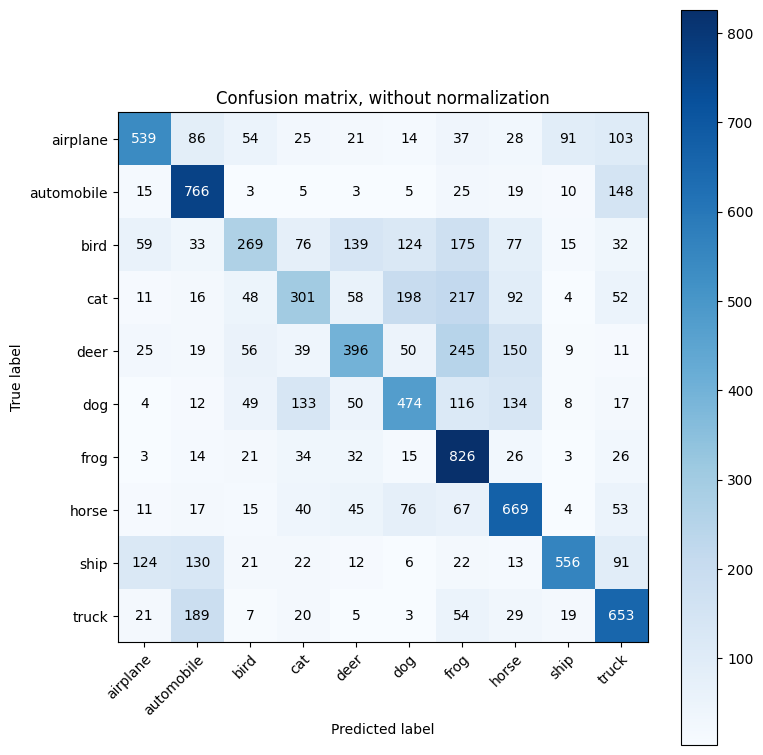

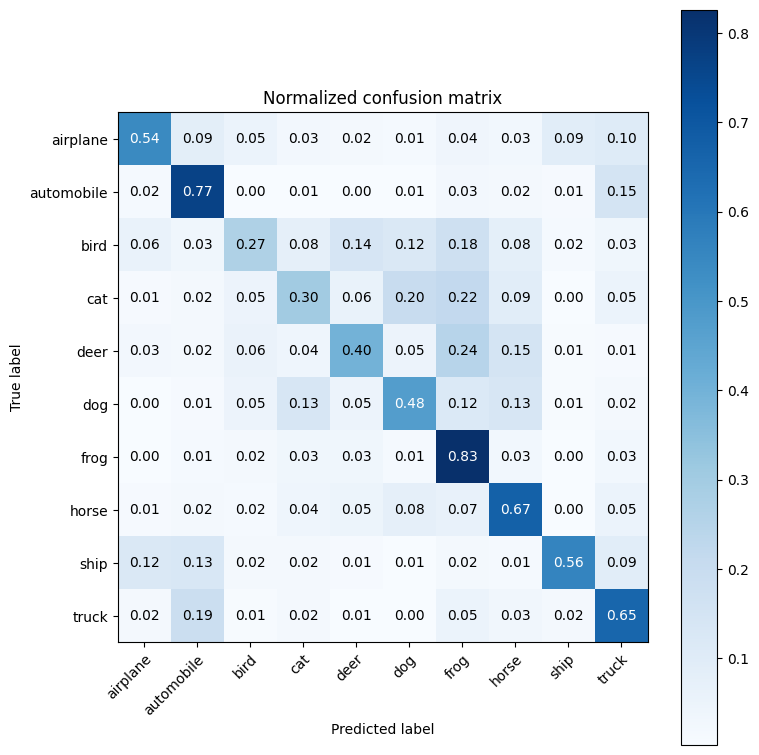

In [18]:
# From:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
N = predictions_class.shape[0]

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_class[:N], predictions_class, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_class[:N], predictions_class, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

Observations:

- The network is not good at recognizing birds, cats, or deer.
- Birds, cats and deer are often confused with frogs (maybe worth exploring further???).
- Cat is sometimes confused with dog (and vice versa).
- Deer is quite often confused with horse
- Truck is often confused with automobile/car (that makes sense), but cars are less often confused with trucks.

###4.4 Precision-Recall and Average Precision
Precision-Recall is a useful measure of success of prediction, especially when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy:

```
precision = #TP/(#TP + #FP)
```

while recall is a measure of how many truly relevant results are returned:

```
recall = #TP/(#TP + #FN)
```

The precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Your task is to modify the multi-class part of [this tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) and make it work on your results.

Note that `y_score` represents a *score* for *each* class. The score is predicted by your model and could for instance be the class probabilities.

**4.4.1 The average precision score in multi-label settings:**

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

N = predictions.shape[0]

# For each class
precision = dict()
recall = dict()
average_precision = dict()

# For each class:
# 1) Calculate precision and recall for different decision thresholds
# 2) Calculate average precision score
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:N, i],
                                                        predictions[:, i])
    average_precision[i] = average_precision_score(y_test[:N, i], predictions[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test[:N,:].ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(y_test[:N,:], predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.59


**4.4.2 Plot the micro-averaged Precision-Recall curve:**

In [20]:
class_labels = labels # from confusion matrix

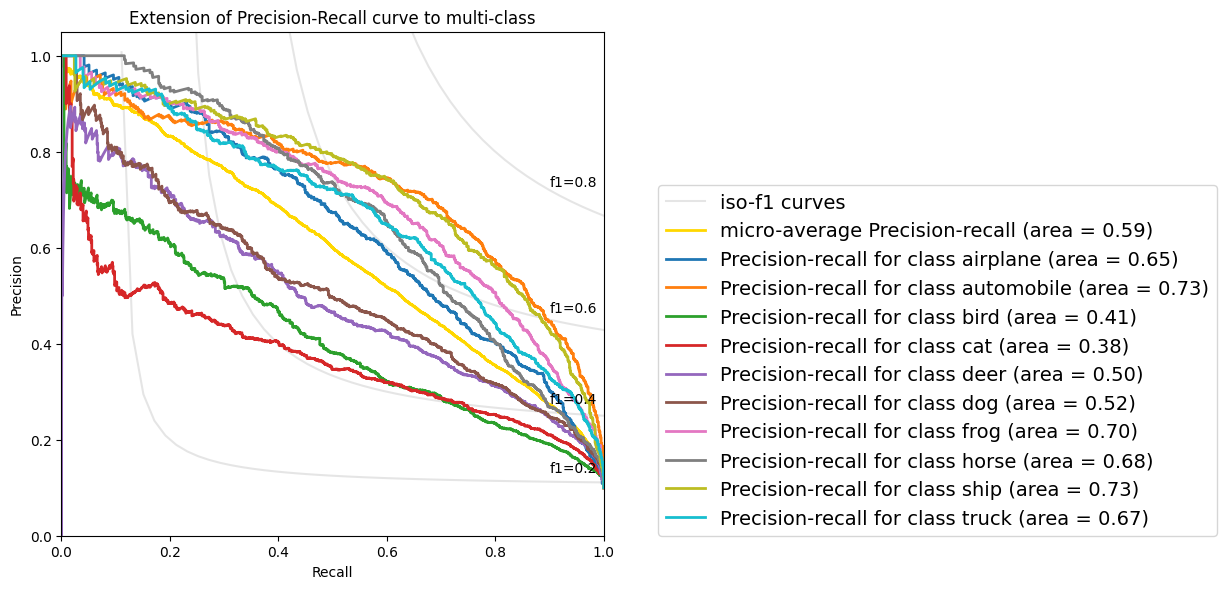

In [21]:
from itertools import cycle

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i in range(num_classes):
    l, = plt.plot(recall[i], precision[i], lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(class_labels[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=14))


plt.show()

The curves summarize how well the classifier performs for each class. The average curve is the yellow one. We would like to have all the curves close to [1,1] (high precision and high recall), so this model is not great.

The model is particularly bad at recognizing cats (red curve), birds (green curve), dogs (brown curve), and deer (purple curve).

The model is best at recognizing ships ("golden" curve?), automobiles (orange curve), and frog (purple curve).

##5: Optional task
Visualize the learned representation (i.e., the output of the encoder) using t-sne. See how it is done in [Lab 2](https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2023/blob/main/Lab2_FeatureExtractionAndTransferLearning.ipynb)